# Exercise 3: working with image datasets, singular value decomposition and principal components

In this exercise session we will:
- learn how to store images in arrays, and review how to do the related manipulation (reshape from vector to matrix, from matrix to vector, etc)
- learn how to perform the SVD of a matrix
- play with a dataset of images called [Labeled Faces in the Wild](https://people.cs.umass.edu/~elm/papers/lfw.pdf). In particular we will compute the principal components, and see what kind of information they can give to us when analysing data.

## Theoretical Exercise

We start with some simple theoretical questions that will help you recap the concepts taught in the lecture.

### Question 1
Consider a matrix $ X \in \mathbb{C}^{n \times d} $. Define the left and right singular vectors. How are they related to the SVD of $ X $?

### Question 2
Consider a matrix $ X \in \mathbb{C}^{n \times d} $. What is its best rank-\( k \) approximation under the mean-squared error norm (a.k.a. Frobenius norm)?

### Question 3
Suppose that the matrix $ X \in \mathbb{R}^{n \times d} $ represents a dataset of points. The dataset contains $ n $ points, each of which is $ d$-dimensional. Call $ X = U \Sigma V^* $ the SVD of $ X $. What is the interpretation of the first $ k $ right singular vectors $ v_1, \dots, v_k $ for $ k \leq d $?


Here are the markdown conversions for the solutions to questions 2, 3, and 4 of exercise 2 (SVD) with the requested LaTeX formatting:

## Solutions: 

### Solution 1

Two vectors $ u \in \mathbb{C}^n $ and $ v \in \mathbb{C}^d $ are a pair of left-right singular vectors of $ X $ if there exists a $ \sigma \in \mathbb{C} $ such that:

$$
Xv = \sigma u \quad \text{and} \quad X^*u = \sigma v
$$

Calling $ X = U \Sigma V^* $ the SVD of $ X $, we have that the pairs $ \{u_a, v_a\} $, where $ u_a $ is the $ a $-th row of $ U $ and similarly for $ v_a $, are pairs of left-right singular vectors.

### Solution 2

The best rank-$ k $ approximation of $ X $ under the mean-squared error norm is given by:

$$
\tilde{X} = U \Sigma_{\leq k} V^*
$$

where $ X = U \Sigma V^* $ is the SVD of $ X $, and $ \Sigma_{\leq k} $ is the matrix $ \Sigma $ in which we keep only the largest $ k $ singular values and set the others to zero.

### Solution 3

The right singular vectors are the principal components of the dataset and represent the $ k $ directions in $ d $-dimensional space along which the dataset's features have the largest variability.

Now let's perform SVD on a real dataset! As usual, we will start by importing python libraries to deal with numerical arrays (numpy) and to be able to plot (matplotlib).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: Images as vectors and matrices

Many datasets are dataset of images. 
How do we represent images in a computer? 
An image (say a black and white image) can be tought of as a matrix of pixels, the value of each pixel representing the light intensity at that pixel.
Thus, an image can be tought of as an element of $\mathbb{R}^{\text{height} \times \text{width}}$, or, in python terms, as a 2-dimensional array of shape ```[height, width]```.


In applications, it is often convenient to store images as vectors instead of matrices.
The number of pixels does not change, but the array that we use to store the values of the pixels changes to a 1-dimensional array of shape ```[height * width]```.
Of course, there are many ways to convert a matrix into a vector. Conventionally, for images, we build the vector by concatenating successively its rows.

Why is it convenient to use 1d arrays? Because then we can store compactly our dataset (collection of images) as a 2d array, each row of the array collecting all the pixels of a different datapoint/image.
For example, a dataset of ```n``` images with given ```height``` and ```width``` will be represented by a 2d array of pixels of shape ```[n, height * width]```.

In this exercise, we warm up by reviewing how to convert from the 2d representation of images to a 1d representation, and viceversa.

We start by initialising a numpy vector representing an image. For the moment, this is just a 1d array of pixel intensities that I am giving to you. 

In [2]:
image = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0.87,1.00,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.55,0.99,0.89,0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53,1.00,0.99,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0.54,0.99,1.00,0.99,0.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.01,0.54,0.99,0.99,1.00,0.99,0.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.12,0.56,0.99,0.99,0.99,1.00,0.90,0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.31,0.85,0.99,0.97,0.50,0.88,1.00,0.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.40,0.86,0.99,0.97,0.15,0,0.87,1.00,0.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08,0.31,0.96,0.99,0.74,0.25,0,0.23,0.96,1.00,0.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0.77,0.99,0.99,0.62,0.08,0,0,0.50,0.99,1.00,0.30,0,0,0,0,0,0.27,0.44,0.06,0,0,0,0,0,0,0,0,0.76,1.00,1.00,0.96,0.28,0.13,0.13,0.05,0.74,1.00,0.89,0.13,0.13,0.13,0.23,0.56,0.77,1.00,0.96,0.30,0,0,0,0,0,0,0,0,0.42,0.80,0.99,0.99,0.99,0.99,0.99,0.81,0.92,0.99,1.00,0.99,0.99,0.99,0.99,0.99,0.99,0.84,0.32,0,0,0,0,0,0,0,0,0,0,0.05,0.34,0.60,0.86,0.99,0.99,0.99,0.99,0.99,1.00,0.99,0.99,0.96,0.60,0.60,0.21,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.03,0.04,0.44,0.56,0.99,0.99,0.87,0.04,0.04,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0.83,0.99,0.87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.74,0.99,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.09,0.86,0.99,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.18,0.99,0.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.18,0.99,0.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0.58,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,])

This seems like a 1d array, but with all these numbers everything seems messy. Can you check (using ```numpy```'s utilities) that this is indeed a vector (and not a matrix or tensor), and find its dimension?

In [3]:
print(f"The number of indices (or dimensions) of the array is {np.size(np.shape(image))}.")
print(f"The dimension is {np.size(image)}.")

The number of indices (or dimensions) of the array is 1.
The dimension is 784.


Now, let's reshape this 1d array into a 2d array (a matrix). To do that, I need to tell you the original 
shape of the image ```[height, width]```, as at the moment you only know the total amount of pixels, i.e. ```height * width```, but not how they are distributed.


Knowing that the image is square (same width and height), compute its 2d shape (width and height), and reshape it (remember that shapes are integers, and to convert a floating point number to an integer you can use the python ```int()``` function).

In [4]:
width = int(np.sqrt(np.size(image)))
new_shape = (width, width)
image_2d = np.reshape(image, new_shape)

print(f"The wanted shape is {new_shape}.")
print(f"The new shape of our data is {np.shape(image_2d)}.")

The wanted shape is (28, 28).
The new shape of our data is (28, 28).


To inspect matrices, it is useful to plot them. We learned how to use the [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function (coming from the matplotlib library) last time. Try to visualise this image using it:

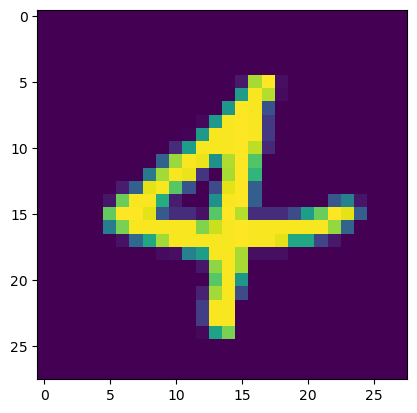

In [7]:
plt.imshow(image_2d)

To add a color bar, i.e. a legend, for imshow, use the command ```plt.colorbar()``` after calling ```imshow```.

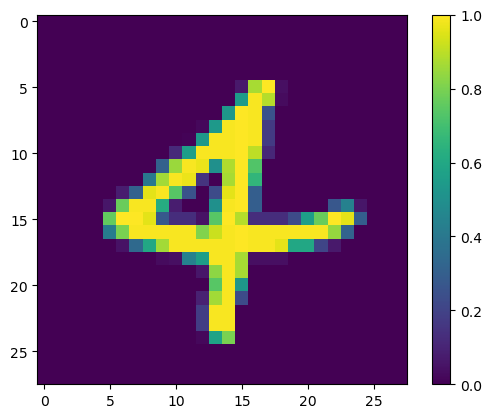

In [8]:
plt.imshow(image_2d)
plt.colorbar()

This image represents an handwritten digit 4. 
It comes from a classic dataset, called MNIST, which is used to train neural networks to perform automatic digit recognition.

Now, try to plot just the bottom-left quarter of the image by extracting the correct indices in the matrix (remember that ```//``` is the integer division).

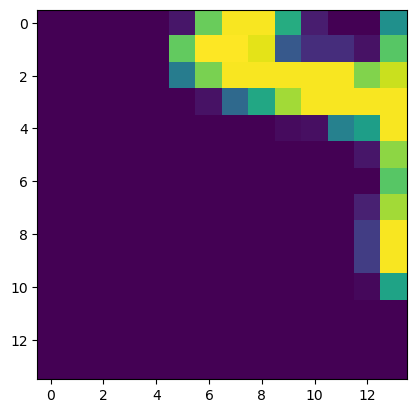

In [9]:
plt.imshow(image_2d[width//2:,:width//2])

To get back the 1d array version of the image, we can reshape it. Try to do that using the ```flatten``` function, and check that the resulting dimension is what you expect.

In [10]:
image_back_to_1d = image_2d.flatten()
print(np.shape(image_back_to_1d) == np.shape(image))

True


In this warm-up exercise, we reviewed how to deal with vectors and matrices, and how to convert between the two representations.
The take home messages are:
- images can be represented both as vectors and matrices of pixels. The vector form is more compact, and nicer when dealing with an entire dataset of images. The matrix form is easier to visualise, and retains more information about which pixels are neighbouring. The two representation are equivalent.
- use ```size, shape, flatten, reshape``` to inspect or alter the shape and size of a numpy vector. Notice in particular how often we used the ```shape``` function to check that the operations we did transformed the array the way we wanted/expected.

## Exercise 2: SVD using numpy's built-in functionality

In this exercise, we learn how to compute the singular value decomposition (SVD) of a matrix.

Consider a rectangular matrix $X \in \mathbb{R}^{n \times d}$, where we think that each of the $n$ rows is a different datapoint of a dataset, and each datapoint lives in $d$ dimensions.
Recall from lecture 2 that each matrix $X$ admits a SVD, i.e. it can be written as $X = U \Sigma V^T$ where 
- $U \in \mathbb{R}^{n \times n}$ is a unitary matrix (rows and columns are orthonormal systems). The columns are called _left singular vectors_.
- $V \in \mathbb{R}^{d \times d}$ is a unitary matrix (rows and columns are orthonormal systems). The columns are called _right singular vectors_.
- $\Sigma \in \mathbb{R}^{n \times d}$ is a matrix of zeros, with only non-zero components on the diagonal. The diagonal entries are called _singular values_, and are all non-negative.

Let's get comfortable with all this by considering a simple example matrix.

In [11]:
X = np.array([[1, 4, 3, 2], [8, 7, 6, 5] ,[11, 12, 10, 9]])
print(X)

[[ 1  4  3  2]
 [ 8  7  6  5]
 [11 12 10  9]]


Find the dimensions of $X$, and call them ```n``` and ```d```.

In [12]:
n = np.shape(X)[0]
d = np.shape(X)[1]
print(f"The dimensions of the matrix are (n,d) = ({n},{d})")

The dimensions of the matrix are (n,d) = (3,4)


```numpy``` provides a [function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html), ```np.linalg.svd```, to compute the SVD of a matrix.
It returns a list of three objects: 
- the matrix $U \in \mathbb{R}^{n \times n}$ of left singular vectors;
- a vector of length $\min(n, d)$ containing the singular values (the diagonal of the matrix $\Sigma$);
- the matrix $V^T \in \mathbb{R}^{d \times d}$ of right singular vectors.

Let's try it on $X$. Compute ```U, S, Vt``` and check what shape they have. Is it what you expected?

Notice that if a function ```f()``` returns a list of values, we can either store its result in a list ```mylist = f()```, or we can _unpack_ directly the list into the appropriate number of variables ```a, b, c = f()``` (in case the return list has length three). You can discover how many results a function returns by inspecting the documentation. In this case, ```np.linalg.svd``` returns a list of three values.

In [13]:
U, S, Vt = np.linalg.svd(X)
print(f"The shapes are (U) {np.shape(U)}, (S) {np.shape(S)} and (Vt) {np.shape(Vt)}")

The shapes are (U) (3, 3), (S) (3,) and (Vt) (4, 4)


Verify that the singular values are decreasing (this is guaranteed when using ```np.linalg.svd``` according to the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html), but we are checking it anyways). To check this, try to print and to plot the singular values. To plot them, use the ```plt.plot``` function, as we did in the last exercise session to plot the distances vs timesteps for the page-rank algorithm.

[25.37516923  2.40968432  0.54240944]


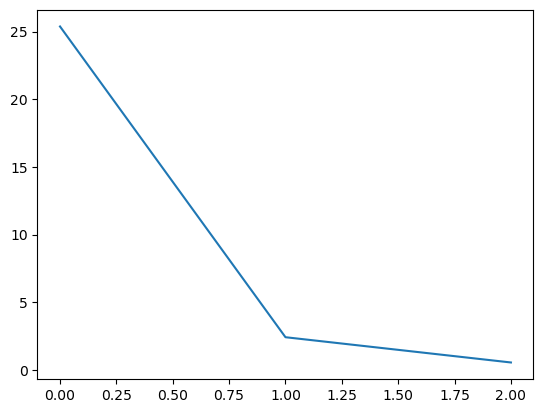

In [14]:
print(S)
plt.plot(S)

One of the rules of the good physicist is to **always** label and title its plots. So let's do that. 
Use the functions ```plt.xlabel()```, ```plt.ylabel()``` and ```plt.title()``` to set the labels of each axis and the overall title of the plot.
If you do not know how these work, Google is your friend (and then, only then, also TAs are your friends)!

Text(0.5, 1.0, 'Singular values of the matrix X')

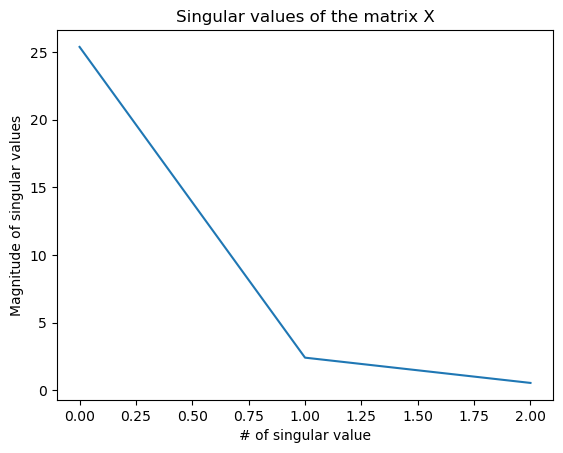

In [15]:
plt.plot(S)
plt.xlabel("# of singular value")
plt.ylabel("Magnitude of singular values")
plt.title("Singular values of the matrix X")

It is useful to know how to convert the vector of singular values into a matrix, as often we want to multiply it with other matrices. 
We can just build a matrix of zeros (we saw how to do that in the first exercise session), and populate its diagonal with the entries of S using the ```np.fill_diagonal()``` function (look at the [documentation](https://numpy.org/doc/stable/reference/generated/numpy.fill_diagonal.html)!). Then, perform a sanity chack that the dimension are good.

In [16]:
Sigma = np.zeros((n, d))
np.fill_diagonal(Sigma, S)
print(f"The shapes of Sigma is {np.shape(Sigma)}, and it should be ({n},{d})")

The shapes of Sigma is (3, 4), and it should be (3,4)


Finally, we can check that the SVD reproduces the original matrix correctly, for example checking that their distance in norm is small.

In [17]:
reconstructed_X = U @ Sigma @ Vt
print(f"||reconstructed_X - X|| = {np.linalg.norm(reconstructed_X - X)}")

||reconstructed_X - X|| = 8.906729185356879e-15


We can also check that the matrices $U$ and $V$ are unitary. To transpose a matrix, use ```np.transpose()```, and to create the $p \times p$ identity matrix use ```np.identity(p)```.

In [18]:
print(f"||U Ut - I_n|| = {np.linalg.norm(U @ np.transpose(U) - np.identity(n))}")
print(f"||Ut U - I_n|| = {np.linalg.norm(np.transpose(U) @ U - np.identity(n))}")
print(f"||V Vt - I_d|| = {np.linalg.norm(np.transpose(Vt) @ Vt- np.identity(d))}")
print(f"||Vt V - I_d|| = {np.linalg.norm(Vt @ np.transpose(Vt) - np.identity(d))}")

||U Ut - I_n|| = 7.702646267062982e-16
||Ut U - I_n|| = 8.060595425036958e-16
||V Vt - I_d|| = 5.906656032251584e-16
||Vt V - I_d|| = 5.595187340889669e-16


In this exercise, we learned how to compute the SVD of a matrix, and how to check that what we obtained makes sense.
The take home messages are:
- the SVD can be used to diagonalise a rectangular matrix in the same way an eigendecomposition can be used to diagonalise a symmetric matrix.
- ```numpy``` has _a lot of built-in functions_. If you need to perform any operation on numpy arrays that is trivial (e.g. filling a diagonal, transposing) or routine (e.g. computing the SVD), chance is that it is already implemented (in our case, through the functions ```np.fill_diagonal```, ```np.transpose``` and ```np.linalg.svd```). Do not be scared by this: google is your friend! Just search for the operation you need to do, append "python numpy" to the search, and you will discover ```numpy```'s functionality little by little. As an example, I learned about the ```np.fill_diagonal``` function right now, while writing this exercise, through a google search :)

## Exercise 3: "Eigenfaces", or the principal components of a dataset of images

Finally, we are equipped to see something cool! In this exercise, we look at the [Labeled Faces in the Wild](https://people.cs.umass.edu/~elm/papers/lfw.pdf) dataset, which is a dataset of images of faces of famous people.
We will download the dataset, and then compute its principal components, i.e. the right singular values. This will allow us to explore a bit this very high-dimensional dataset.

We start by loading the dataset. We use a numpy function called ```np.load``` to load the file ```faces.npy```, where the dataset was pre-saved. This file was generated by saving a matrix with the function ```np.save```. This pair of functions is useful if you need to store and retrieve numpy data.

In [37]:
faces = np.load("faces.npy")

Let's give a first look at the dataset. What shape is ```faces```? Knowing that the images are square (and thus some number must be a perfect square...), how many images are there?

In [ ]:
print(f"The shape is {np.shape(faces)}.")
print(f"There are {np.shape(faces)[0]} images, because sqrt({np.shape(faces)[1]}) = {np.sqrt(np.shape(faces)[1])} \
        is an integer and sqrt({np.shape(faces)[0]}) ~ {np.sqrt(np.shape(faces)[0]):.2f} is not.")

Define the following variables: ```n``` the number of images, ```d``` their dimension, and ```w``` the size of the side of the image in pixels (use int to convert them to integer, if they are not already).

In [39]:
n = np.shape(faces)[0]
d = np.shape(faces)[1]
w = int(np.sqrt(d))
print([n,d,w])

[1348, 3844, 62]


Plot the first 10 images, after having reshaped them appropriately (see Exercise 1). Call ```plt.show()``` in between every ```imshow``` call. Otherwise you will only see the last image, as ```imshow``` overwrites its internal content (what he will plot) at each call. Add a colorbar to the images using the ```plt.colorbar()``` function (before calling ```plt.show()```)

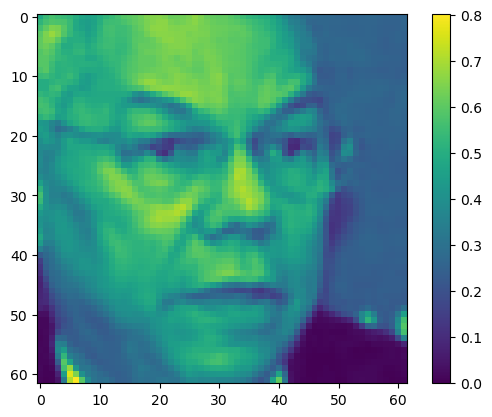

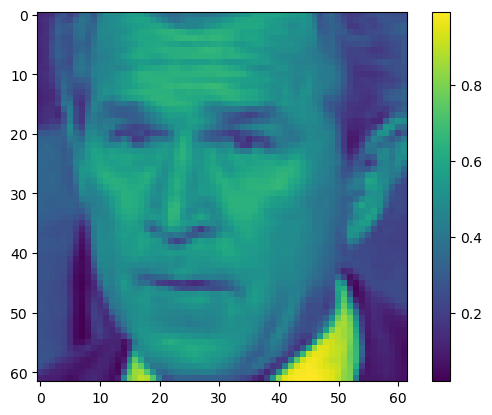

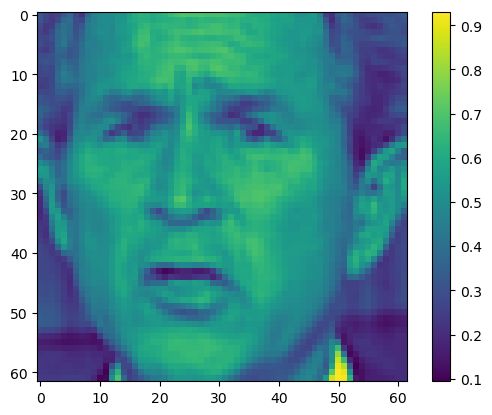

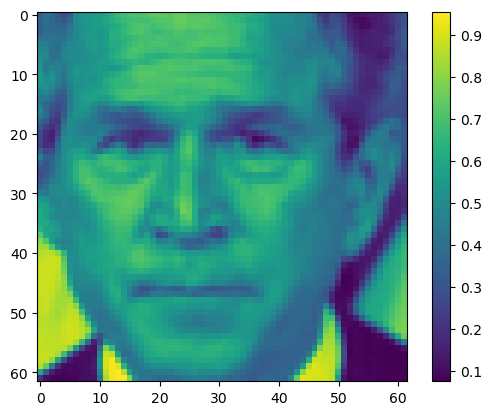

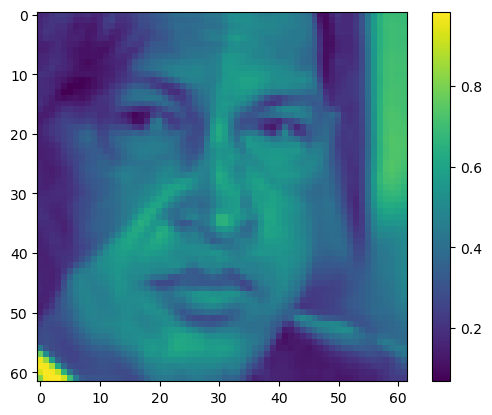

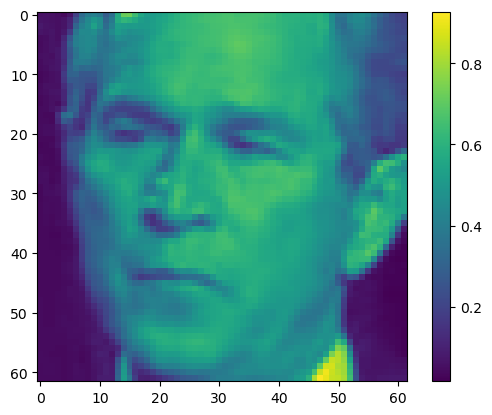

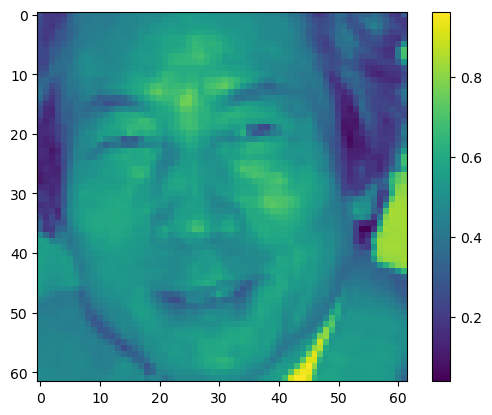

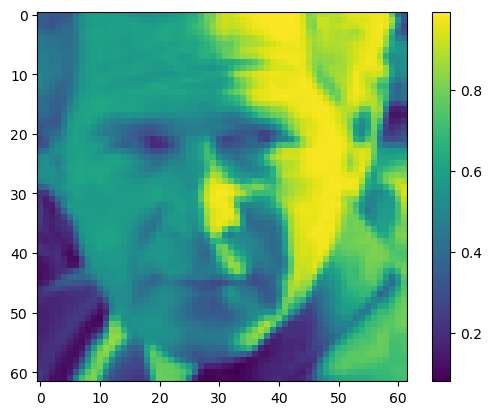

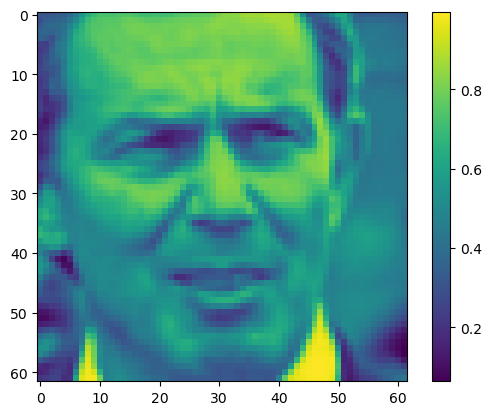

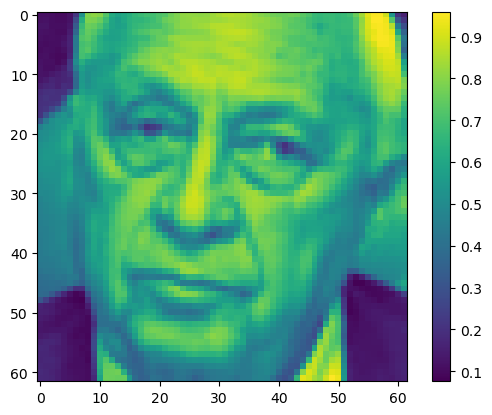

In [40]:
for i in range(10):
    plt.imshow(np.reshape(faces[i], (w, w)))
    plt.colorbar()
    plt.show()

Before computing the principal components / SVD, we do some preprocessing on our data. We want to center our dataset, otherwise the first principal component will pick up the average of the data.
Start by computing the average of all datapoints (use ```np.mean```) and plot it (do not forget reshaping and colorbar!).
Hint: look at the documentation, if you just call ```np.mean(faces)``` you will obtain the average of all pixels of all images!

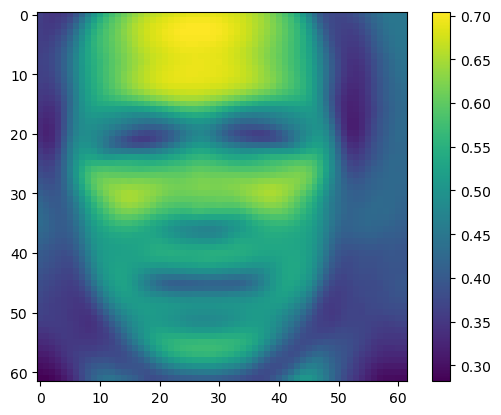

In [41]:
avg_face = np.mean(faces, axis=0)
plt.imshow(avg_face.reshape((w,w)))
plt.colorbar()

Already the average image tells us a lot! On average, the images have a face in the center, roughly half the size of the full image, and looking straight at us. 
Also, it seems that on average the people in the images like to wear white shirts!

To center the dataset, we subtract the average face from all the datapoints. Try to do that,
check that you succeded, and plot again the first 10 centered images.

Check that the new mean is 0 for every pixel. Mean = [ 9.0202875e-08 -5.8897172e-08  7.1797508e-08 ... -6.0533203e-08
  1.3592336e-07  1.3366828e-07]


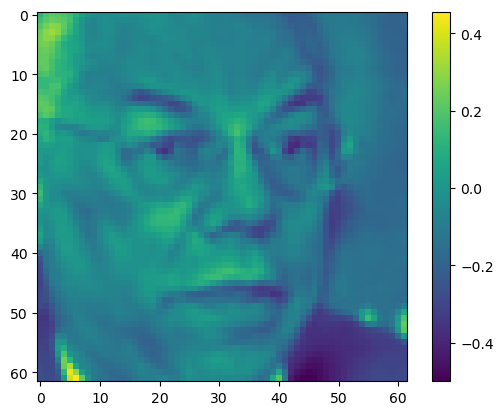

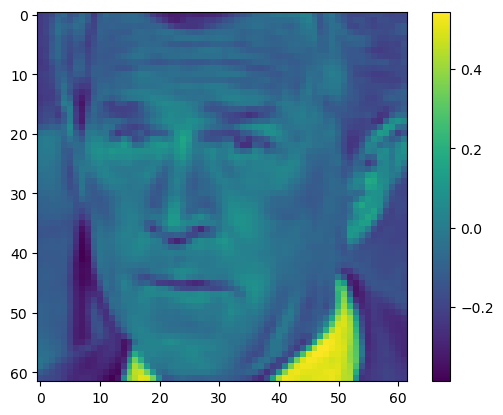

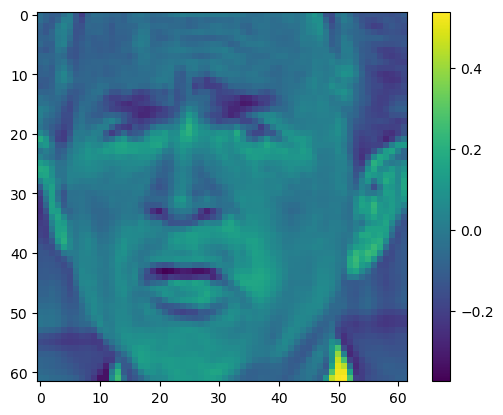

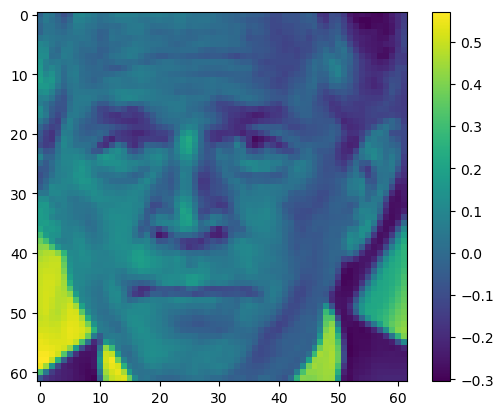

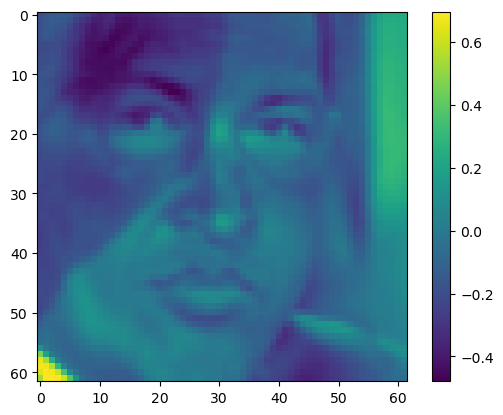

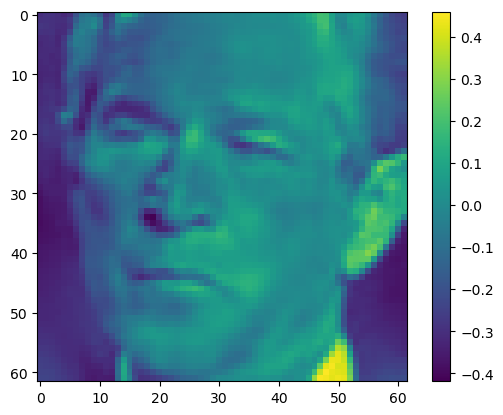

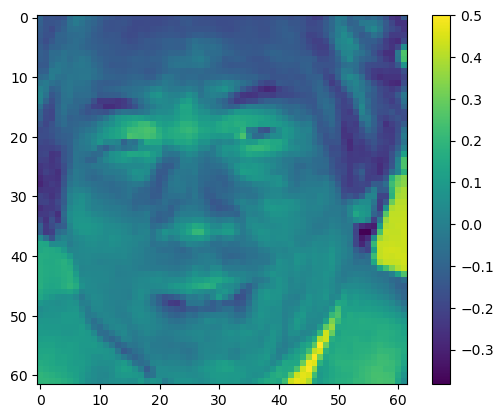

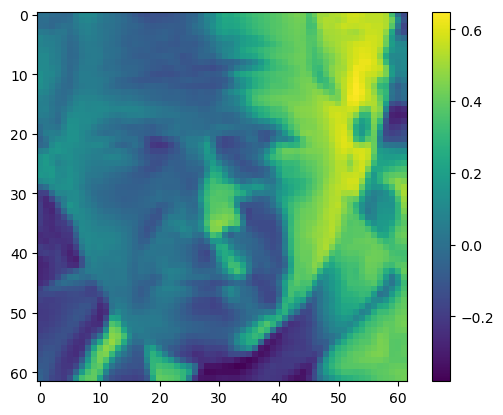

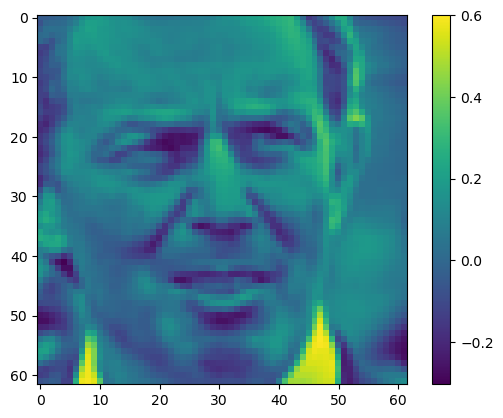

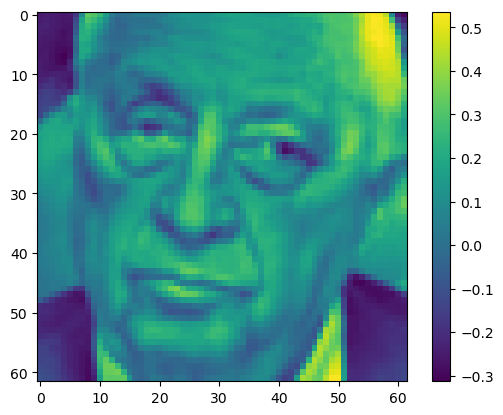

In [42]:
centered_faces = faces - avg_face
print(f"Check that the new mean is 0 for every pixel. Mean = {np.mean(centered_faces, axis=0)}")

for i in range(10):
    plt.imshow(np.reshape(centered_faces[i], (w, w)))
    plt.colorbar()
    plt.show()

Then, we normalize the images in order for the pixels to have the same standard deviation. 
You may have not heard of standard deviation before: it is a measure of how much some dataset varies around its mean. A high standard deviation means that the average is a poor estimate of the behaviour of the dataset, as there may be large deviations around it in each datapoint. A small standard deviation means that the average is a good estimate of the behaviour of every single datapoint, as each of them does not differ much from the average.

The normalisation using the standard deviation avoids that some pixel that varies wildly dominates the SVD, while other pixel that vary less become negligible.
Compute the standard deviation of the centered faces using ```np.std()``` (very similar to the ```np.mean``` function), and normalize them by the standard deviation.
Perform a check, and plot again the first 10 images (with colorbars).

Check that the new standard deviation is 1 for every pixel. Standard deviation = [0.99999994 1.         0.99999964 ... 1.0000004  1.0000001  1.0000001 ]


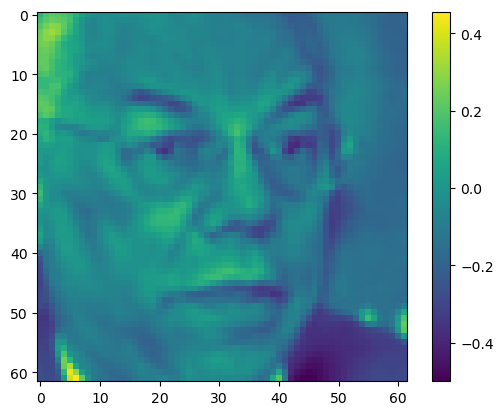

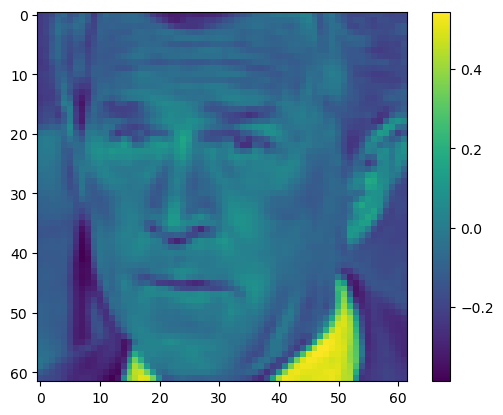

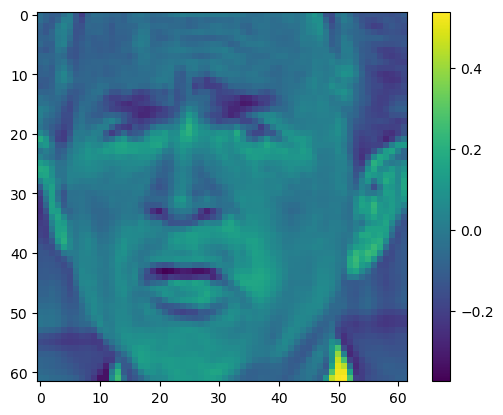

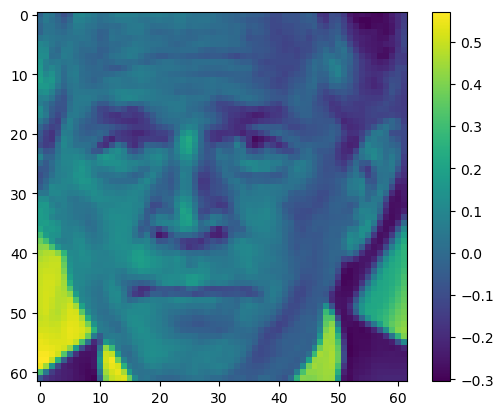

In [43]:
std_face = np.std(faces, axis=0)
normalized_faces = centered_faces / std_face
print(f"Check that the new standard deviation is 1 for every pixel. Standard deviation = {np.std(normalized_faces, axis=0)}")

for i in range(4):
    plt.imshow(np.reshape(centered_faces[i], (w, w)))
    plt.colorbar()
    plt.show()

Now, with nicely normalized data, we can compute the SVD (see Exercise 2). It may take a couple of minutes as the dataset is "big" (it is very small compared to standard datasets that you will encounter in the future, but big with respect to our example in Exercise 2).

In [44]:
U, S, Vt = np.linalg.svd(normalized_faces)

Plot the singular values (with labels and a title), to check that they are sorted in decreasing order.

Text(0.5, 1.0, 'Singular values of the matrix X')

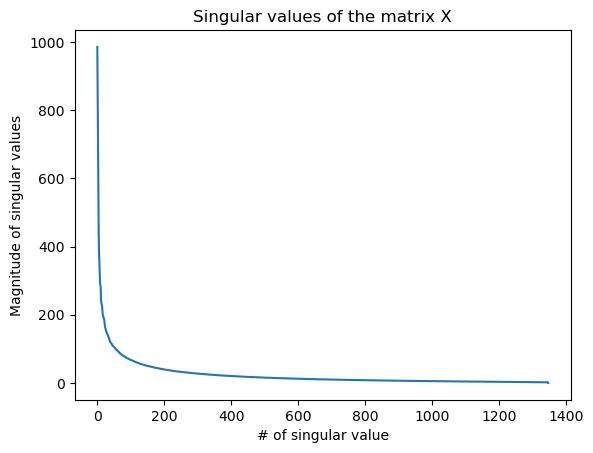

In [45]:
plt.plot(S)
plt.xlabel("# of singular value")
plt.ylabel("Magnitude of singular values")
plt.title("Singular values of the matrix X")

Many singular values are very close to zero. It is useful to plot them in y-log scale. 
To do so, use the command ```plt.yscale('log') ``` just after the plotting command.

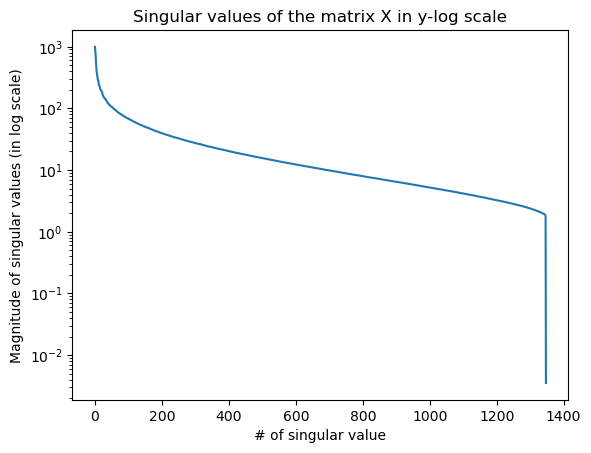

In [46]:
plt.plot(S)
plt.xlabel("# of singular value")
plt.ylabel("Magnitude of singular values (in log scale)")
plt.title("Singular values of the matrix X in y-log scale")
plt.yscale('log') 

Thus, the first principal components (columns of V) will correspond to larger singular values, i.e. to more important features of our dataset, while the last principal components will correpsond to minor features of the dataset.

Let's start by plotting the first 10 principal components (first ten columns of V, notice that Vt is the transpose of V!) as images (with colorbars). Try to interpret the results yourself before reading further.

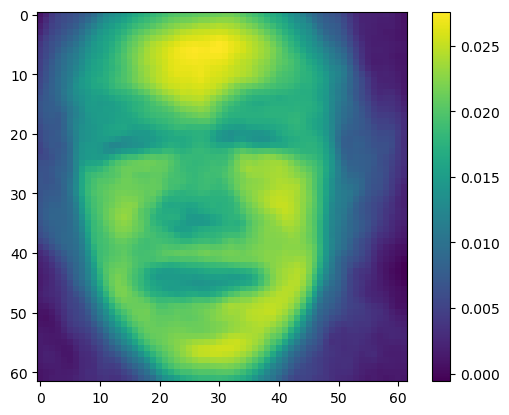

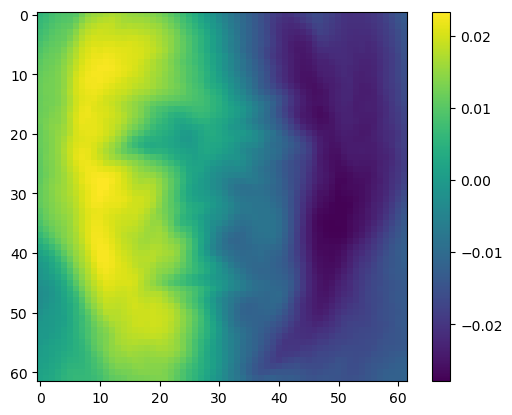

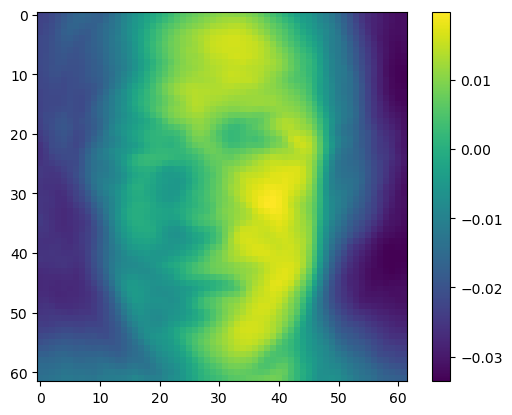

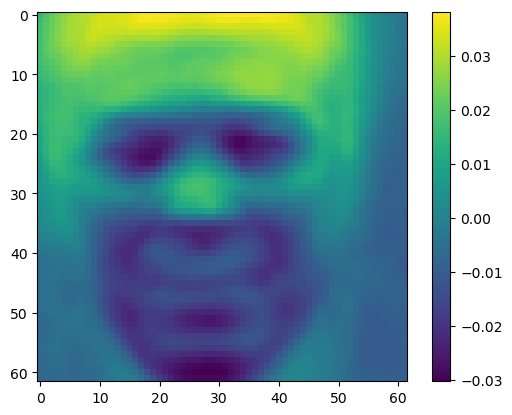

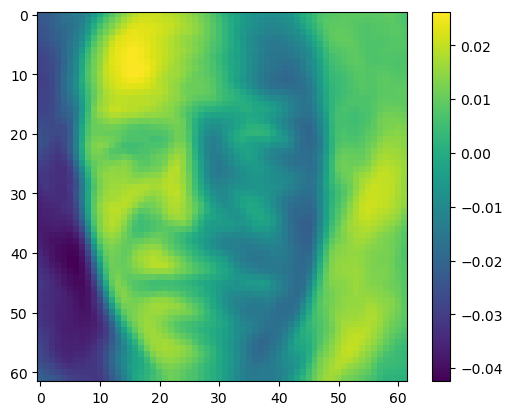

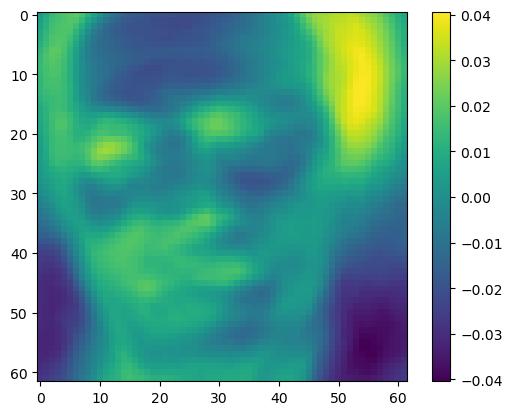

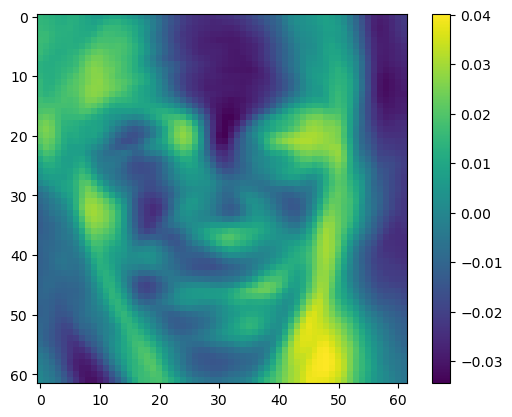

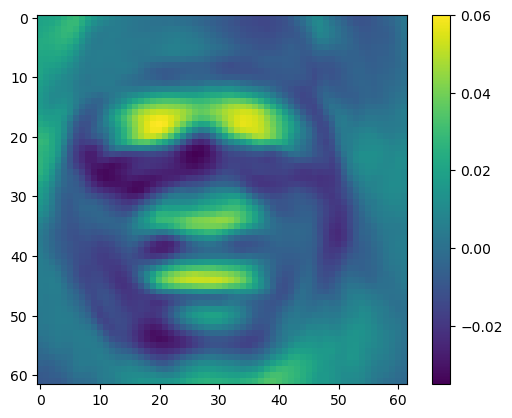

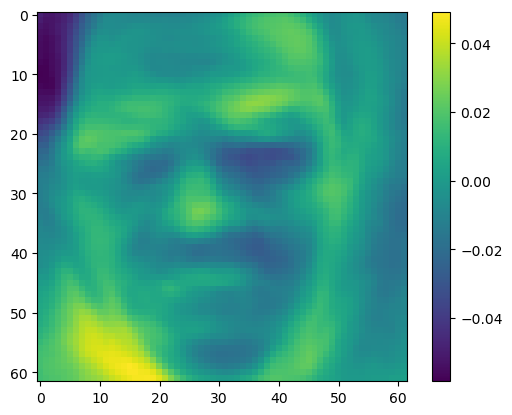

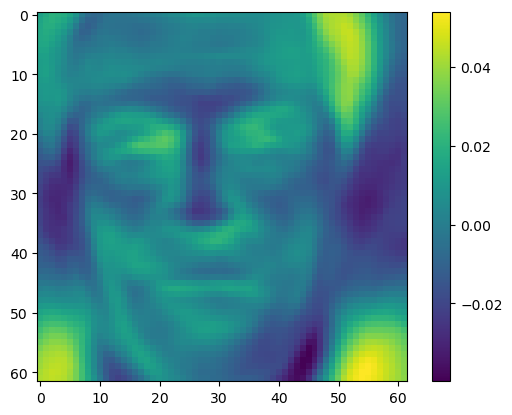

In [48]:
V = np.transpose(Vt)
for i in range(10):
    plt.imshow(np.reshape(V[:,i],(w,w)))
    plt.colorbar()
    plt.show()

In these images, bright yellow regions are regions with positive entries, and blue/green regions have zero entries, and dark blue/purple regions have negative entries. Thus, for example, the first principal component tells us that there the most of the variation is in the region of the face (with respect to the average face) and it positive, i.e. faces on average tend to "come forward", while the second and third principal components represent left and right rotation of the head (positive entries on a side, negative on the other). 

Now plot the the principal components corresponding to the 1000th, 1001st, 1002nd and 1003rd singular values.

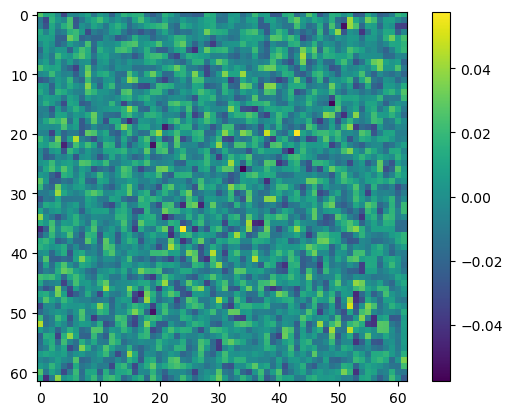

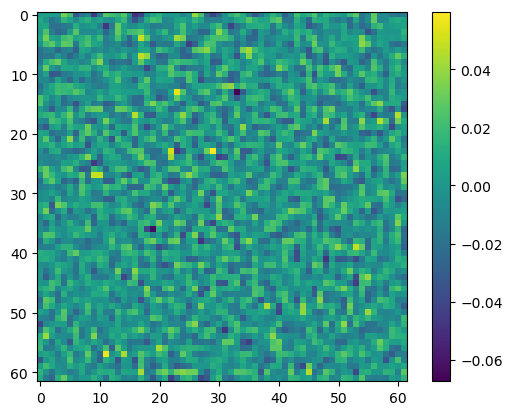

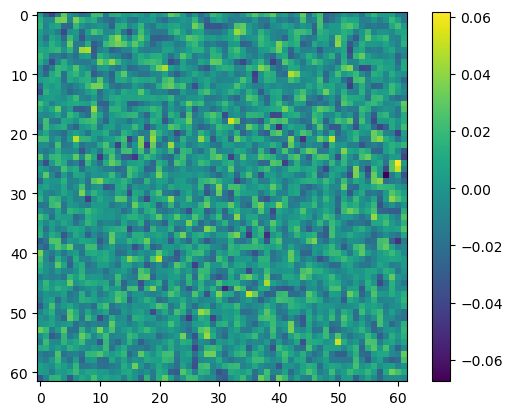

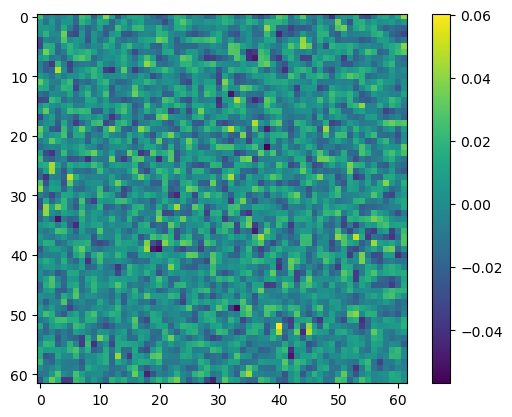

In [49]:
for i in range(4):
    plt.imshow(np.reshape(V[:,1000+i],(w,w)))
    plt.colorbar()
    plt.show()

We see that the principal components corresponding to smaller singular values are very noisy, highlighting very high-frequency variation of the dataset. These principal components give us much less information about the overall variability of the dataset than the dominant principal components. 
This confirms our intuition that principal components with large singular values are generic features of the dataset, and principal components with small singular values are very specific features, not highlighting any general feature of the dataset.

We can also project an original normalized sample along the first principal components. We can write a function to do that.
Recall the the orthogonal projection of a vector $\vec{a}$ over a set of orthonormal vectors $\{\vec{v}_m\}_{m=1}^k$ (call the projection $\vec{b}$) is given by 
$$
    \vec{b} = \sum_{m = 1}^k (\vec{v}_k \cdot \vec{a}) \vec{v}_k
$$
where $\cdot$ is the scalar product ```np.dot```. 

Write a function that takes as input a vector and a matrix whose columns are the orthonormal vectors we want to project our vector over, and returns the projected vector.

In [50]:
# image = 1d array of length d
# pcs = 2d array of shape (d, k)
def projection(image, pcs):
    projected_image = np.zeros(image.shape)
    for i in range(np.shape(pcs)[1]):
        projected_image = projected_image + np.dot(pcs[:,i], image) * pcs[:, i]
    return projected_image

Now show the projection over the first ```[5,10,30,100,500,1000,1348]``` principal components of the first image of the normalized dataset (recall that as the singular values are ordered decreasingly, the first principal components should be important features of the dataset, and the last principal components should be less important features). Try to interpret the results yourself before reading further.

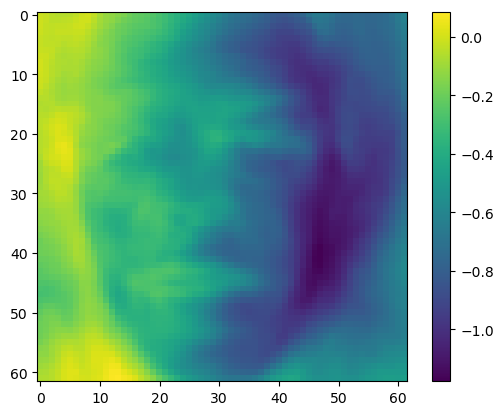

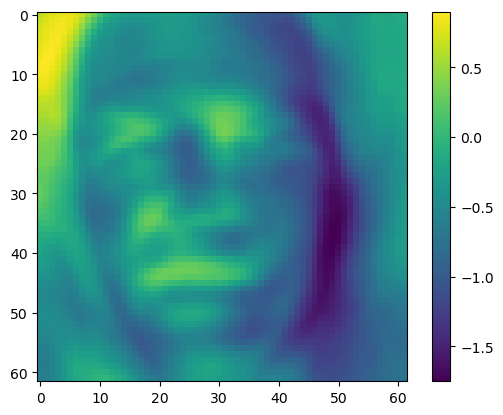

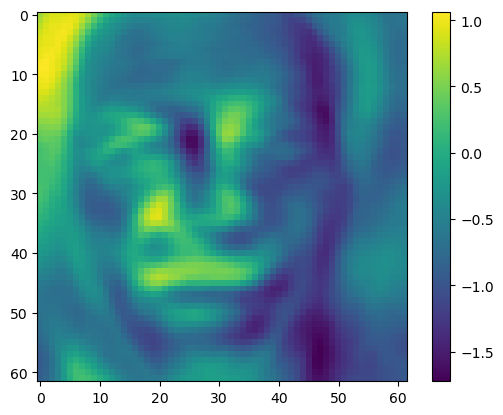

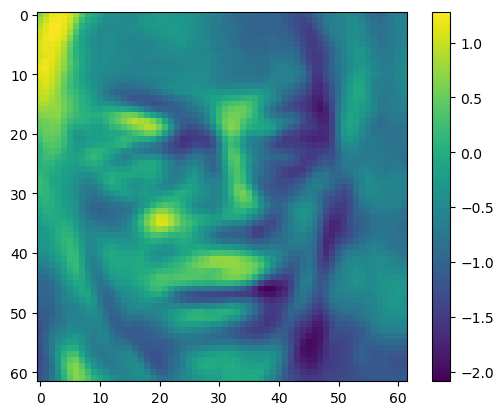

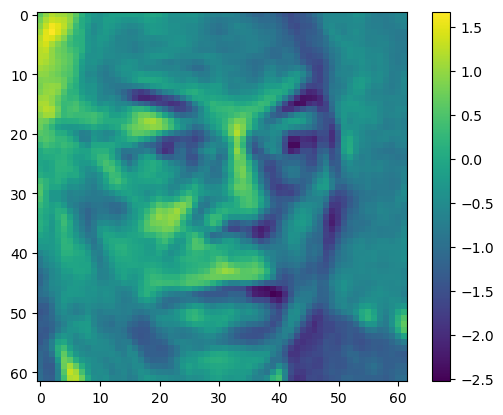

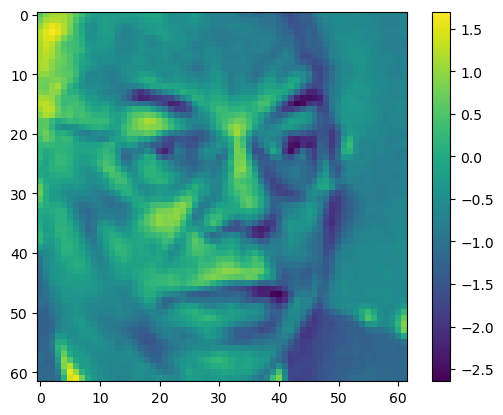

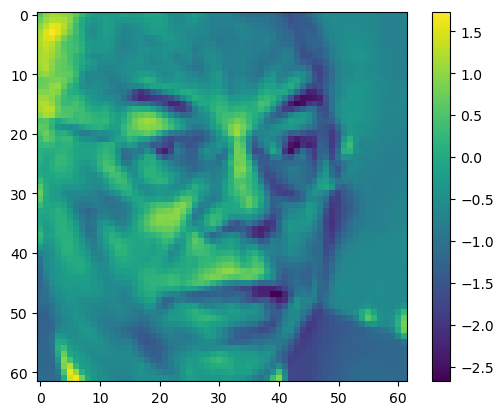

In [52]:
for k in [5,10,30,100,500,1000,1348]:
    projected_image = projection(normalized_faces[0], V[:, range(k)])
    plt.imshow(np.reshape(projected_image, (w,w)))
    plt.colorbar()
    plt.show()

We see that as the number of principal component increases, more and more details are recovered in the original image.
In some sense, the first principal components (corresponding to larger singular values) pick up the general features of the dataset, while the last principal components (corresponding to smaller singular values) pick up image specific fine details.

After this example, you may also be convinced that SVD can be also seen as a compression method. Instead of storing the entire dataset (```n * d``` floating point numbers), you can just store a limited number of principal components, say ```k```, and then for each image store the ```k``` projection coefficients along the selected principal components. This amounts to ```k * d + k * n``` floating point numbers, which may be much smaller than ```n * d``` if $n, d \gg 1$ (large amount of high-dimensional data) and $k$ is not very large (first principal components allowing for faithful enough reconstruction of the dataset).

This brings us to the conclusion of this exercise. We learned how to normalize a dataset, trained a bit of our visualization skills, applied the SVD machinery to a true dataset, and learned what principal components can teach us of a dataset.
The take home messages are:
- always consider whether you should normalize your dataset. This avoids that a non-zero average, or that dimensions with different variation scales, bias your algorithms.
- SVD on large datasets becomes more computationally expensive. 
- Principal components give us a set of features, ranging from very generic feature that are common to all datapoints / images, to very specific features (in our case, pixel-wise features).
- When writing code, try to identify reusable bits (in our case, the projection routine) and pack them into functions to improve readability of your code.

A final consideration: you may wonder if we need to explicitly use the SVD decomposition numpy function to perform principal component analysis, or if there is a more convenient way to to the analysis, and access the relevant informations. 
The answer is: this is Python, of course there is a more convenient way of doing principal component analysis! 
Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).